In [14]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler,PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoLars
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
#from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the data 
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [6]:
test.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


the shape of train data (330045, 7)
the shape of test data (141448, 6)


In [8]:
train.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


In [9]:
train.isna().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64

In [10]:
test.isna().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
dtype: int64

In [11]:
pandas_profiling.ProfileReport(train)

In [12]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ID            235711.0
Reputation      4836.0
Answers            3.0
Username       82751.0
Views          24276.0
Upvotes           99.0
dtype: float64


<AxesSubplot:xlabel='Reputation'>

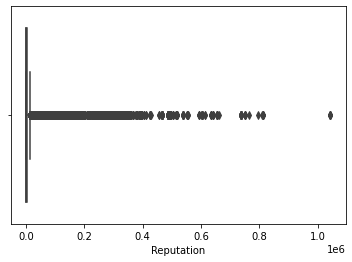

In [13]:
import seaborn as sns
sns.boxplot(x=train['Reputation'])

<AxesSubplot:xlabel='Answers'>

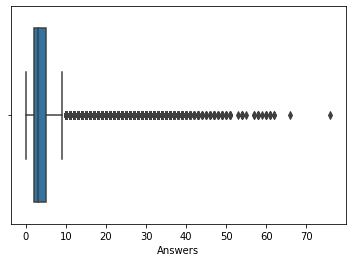

In [14]:
sns.boxplot(x=train['Answers'])

<AxesSubplot:xlabel='Views'>

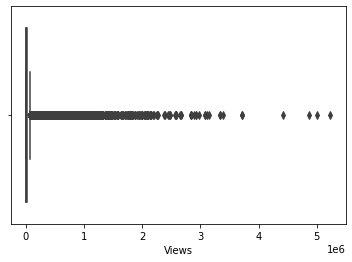

In [15]:
sns.boxplot(x=train['Views'])

In [16]:
train_ol = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]

In [17]:
train_ol

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0
5,345568,r,440.0,1.0,23866,5577.0,4.0
...,...,...,...,...,...,...,...
330040,339800,c,36.0,2.0,84919,1063.0,0.0
330041,253800,c,1649.0,2.0,76730,23319.0,73.0
330042,210756,c,6178.0,2.0,91701,2453.0,15.0
330043,56089,j,89.0,2.0,80245,2107.0,3.0


In [18]:
train

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0
...,...,...,...,...,...,...,...
330040,339800,c,36.0,2.0,84919,1063.0,0.0
330041,253800,c,1649.0,2.0,76730,23319.0,73.0
330042,210756,c,6178.0,2.0,91701,2453.0,15.0
330043,56089,j,89.0,2.0,80245,2107.0,3.0


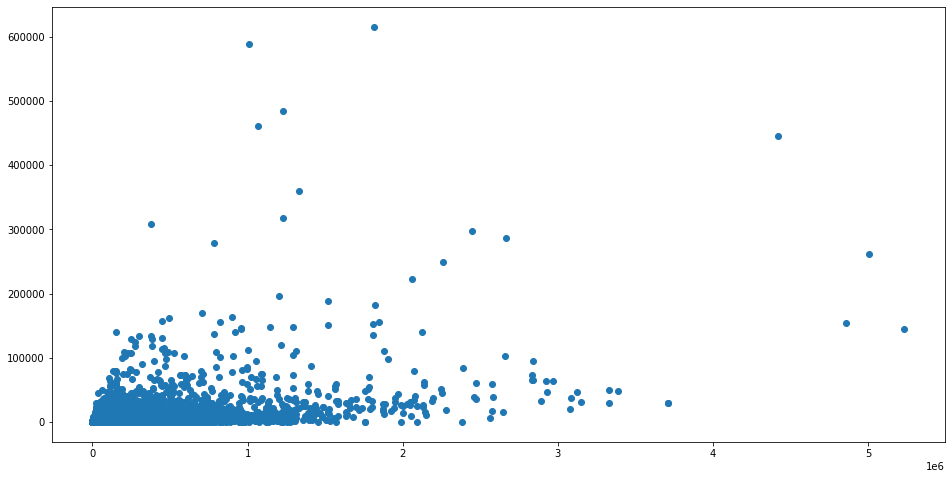

In [19]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train['Views'],train['Upvotes'])
plt.show()

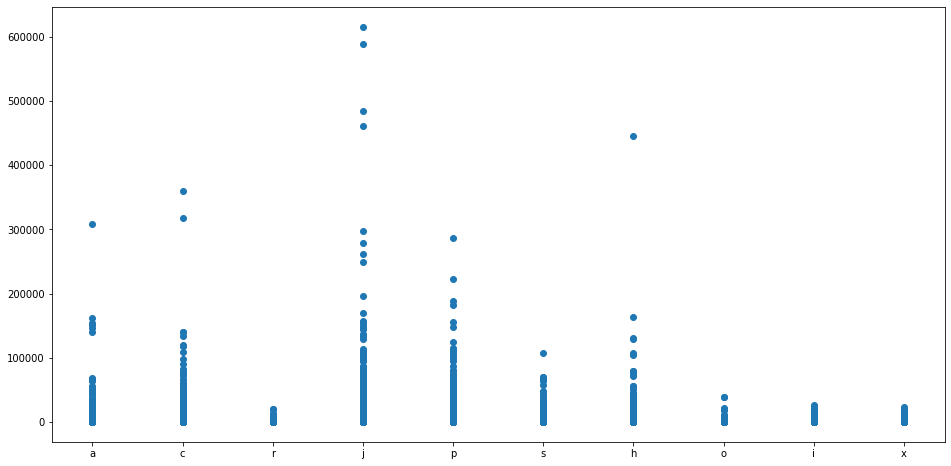

In [20]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train['Tag'],train['Upvotes'])
plt.show()

In [21]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out


In [22]:
df_username_ol = remove_outlier(train,'Views')
df_username_ol.shape

(294084, 7)

In [23]:
train.drop(["ID","Username"],inplace = True,axis = 1)

In [24]:
df_mean = train.groupby('Tag').mean()

In [25]:
df_mean

,Reputation,Answers,Views,Upvotes
Tag,,,,
a,6065.168102,4.259189,31800.916327,316.460136
c,10566.420657,4.047697,26746.676875,327.569916
h,6985.072116,3.778837,33948.958812,384.719704
i,5238.884290,3.679753,15806.680093,117.386636
j,8285.527730,4.347256,43291.211236,540.364686
o,5656.755603,3.380654,13504.645538,112.157294
p,8062.053033,3.977077,33184.984334,407.351971
r,5290.282109,2.304292,12033.055940,79.027246
s,6545.661622,3.600866,25807.082965,237.031385


<AxesSubplot:>

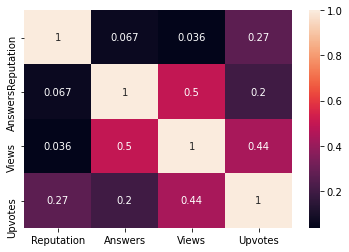

In [26]:
plt.figure(figsize = (6,4))
cmap = train.corr()
sns.heatmap(cmap,annot = True)

Text(0, 0.5, 'Views')

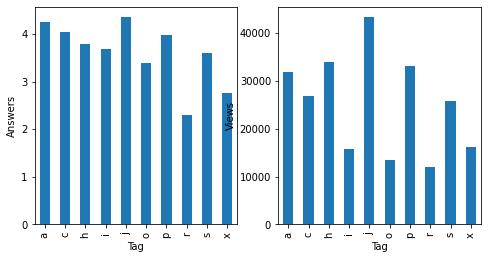

In [27]:
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
df_mean['Answers'].plot(kind='bar')
plt.ylabel("Answers")
plt.subplot(1,2,2)
df_mean['Views'].plot(kind='bar')
plt.ylabel("Views")


In [3]:
le = LabelEncoder()
train["Tag"] = le.fit_transform(train['Tag'])
train["Tag"]

0         0
1         0
2         1
3         0
4         1
         ..
330040    1
330041    1
330042    1
330043    4
330044    4
Name: Tag, Length: 330045, dtype: int32

In [4]:
X = train.drop(columns='Upvotes')
y = train['Upvotes']

In [5]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3, random_state = 24)

In [6]:
stnd_x =StandardScaler()
train_X = stnd_x.fit_transform(train_X)
test_X  =  stnd_x.fit_transform(test_X)

In [7]:
def run_model_validate(model, train_X, train_y, test_X, test_y):
    model.fit(train_X, train_y)
    pred_train = model.predict(train_X)
    pred_test = model.predict(test_X)
    #print("Train - MSE",mean_squared_error(train_y, pred_train))
    #print("Test - MSE",mean_squared_error(test_y, pred_test))
    return model, np.sqrt(mean_squared_error(train_y, pred_train)), np.sqrt(mean_squared_error(test_y, pred_test))

In [8]:
poly = PolynomialFeatures(degree=3)

In [9]:
new_x = poly.fit_transform(train_X)
new_test_x = poly.fit_transform(test_X)




In [35]:
result = []
#model = [Lasso(alpha=0.025),LassoLars(alpha=0.025),Ridge(alpha=0.025),LinearRegression]
model = [Lasso,LassoLars,Ridge]
for model in model:
    print ("Model Name:",model)
    for i in [0,0.025,0.05]:
        model_name,Train_RMSE, Test_RMSE = run_model_validate(model(alpha=i), new_x, train_y, new_test_x, test_y)
        result.append([model_name, Train_RMSE, Test_RMSE])

Model Name: <class 'sklearn.linear_model._coordinate_descent.Lasso'>
Model Name: <class 'sklearn.linear_model._least_angle.LassoLars'>
Model Name: <class 'sklearn.linear_model._ridge.Ridge'>


In [36]:
pd.DataFrame(result, columns = ["model_name", "Train_RMSE", "Test_RMSE"]) # For alpha 0,0.025,0.05 and poly degree 4

,model_name,Train_RMSE,Test_RMSE
0,"Lasso(alpha=0, copy_X=True, fit_intercept=True...",1036.611093,1276.297578
1,"Lasso(alpha=0.025, copy_X=True, fit_intercept=...",1036.611112,1276.335897
2,"Lasso(alpha=0.05, copy_X=True, fit_intercept=T...",1036.611169,1276.374263
3,"LassoLars(alpha=0, copy_X=True, eps=2.22044604...",1036.611093,1276.297614
4,"LassoLars(alpha=0.025, copy_X=True, eps=2.2204...",1041.902660,1284.218096
5,"LassoLars(alpha=0.05, copy_X=True, eps=2.22044...",1048.000848,1325.390277
6,"Ridge(alpha=0, copy_X=True, fit_intercept=True...",1036.611092,1276.297591
7,"Ridge(alpha=0.025, copy_X=True, fit_intercept=...",1036.611093,1276.298201
8,"Ridge(alpha=0.05, copy_X=True, fit_intercept=T...",1036.611093,1276.298788


In [ ]:
model = RandomForestRegressor()
# fit the model
model.fit(new_x, train_y)

In [ ]:
sfm = SelectFromModel(model, threshold=0.003)

In [ ]:
sfm.fit(new_x, train_y)

In [72]:
labels = ['Tag','Reputation','Answers','Views']


In [73]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(labels[feature_list_index])

Answers


IndexError: list index out of range

In [ ]:
X_important_train = sfm.transform(new_x)
X_important_test = sfm.transform(new_test_x)

In [75]:
X_important_train

array([[-8.13783013e-02,  6.86126304e-02, -5.58357930e-03, ...,
        -9.50481004e-03, -3.83104063e-04,  3.23007203e-04],
       [-2.00997911e-01,  3.04724408e-01, -6.12489693e-02, ...,
        -5.28450140e-02, -1.86640559e-02,  2.82957836e-02],
       [-2.84687686e-01,  2.01329544e-01, -5.73160421e-02, ...,
         4.67806267e-02, -1.15394126e-02,  8.16060823e-03],
       ...,
       [ 7.55116573e-01, -3.53068150e-01, -2.66607612e-01, ...,
         1.42997051e-01,  9.41306562e-02, -4.40124582e-02],
       [-5.25172320e-02, -8.36148678e-02,  4.39122141e-03, ...,
        -2.35526552e-03, -3.67171398e-04, -5.84588843e-04],
       [-2.83588915e-01, -3.63715961e-01,  1.03145815e-01, ...,
        -2.64598026e-02, -3.75157791e-02, -4.81157300e-02]])

In [48]:
model = RandomForestRegressor()

In [49]:
model.fit(X_important_train, train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [50]:
pred_train = model.predict(X_important_train)

In [51]:
np.sqrt(mean_squared_error(train_y, pred_train))

532.5155780325961

In [52]:
pred_test = model.predict(X_important_test)

In [53]:
np.sqrt(mean_squared_error(test_y, pred_test))

1073.1333881506791

In [1]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:



NameError: name 'model' is not defined

In [55]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [57]:
#grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [58]:
#grid_search.fit(X_important_train, train_y)

In [59]:
#grid_search.best_params_

In [76]:
result = []
#model = [Lasso(alpha=0.025),LassoLars(alpha=0.025),Ridge(alpha=0.025),LinearRegression]
model = [RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(),XGBRegressor()]
for model in model:
    print ("Model Name:",model)
    model_name,Train_RMSE, Test_RMSE = run_model_validate(model, X_important_train, train_y, X_important_test, test_y)
    result.append([model_name, Train_RMSE, Test_RMSE])

Model Name: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Model Name: AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)
Model Name: GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_

In [77]:
pd.DataFrame(result, columns = ["model_name", "Train_RMSE", "Test_RMSE"]) 

,model_name,Train_RMSE,Test_RMSE
0,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",416.778992,975.875598
1,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",1037.315076,1245.912252
2,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",580.110664,1012.806011
3,"XGBRegressor(base_score=0.5, booster='gbtree',...",239.763364,1119.786532


In [78]:
df_results = pd.DataFrame(result, columns = ["model_name", "Train_RMSE", "Test_RMSE"]) 

In [79]:
df_results["model_name"]

0    (DecisionTreeRegressor(ccp_alpha=0.0, criterio...
1    (DecisionTreeRegressor(ccp_alpha=0.0, criterio...
2    ([DecisionTreeRegressor(ccp_alpha=0.0, criteri...
3    XGBRegressor(base_score=0.5, booster='gbtree',...
Name: model_name, dtype: object

In [80]:
print(model)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)


In [81]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}



In [82]:
xgb_grid = GridSearchCV(model,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)



In [83]:
xgb_grid.fit(X_important_train, train_y)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed: 13.3min finished


[11:38:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[11:38:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:40:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs...
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
             iid='deprecated', n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [

In [84]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.8491816909682195
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [88]:
xgbr = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=7,
             min_child_weight=4, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7, tree_method='exact',
             validate_parameters=1, verbosity=None, silent = 1 )

In [90]:
model_name,Train_RMSE, Test_RMSE = run_model_validate(model, X_important_train, train_y, X_important_test, test_y)

In [91]:
Test_RMSE

1119.7865324873712

In [11]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
#pprint(random_grid)

In [15]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [16]:
# Fit the random search model
rf_random.fit(X_important_train, train_y)

NameError: name 'X_important_train' is not defined

In [ ]:
rf_random.best_params_